In [7]:
# Data Analysis for Physics Assignment
# Fysiikan tehtävä - Datan analysointi
import pandas as pd
import numpy as np

# Luetaan PhyPhox-data CSV-tiedostosta
print("📊 Ladataan PhyPhox-mittausdata...")
df = pd.read_csv("Raw Data.csv")

# Näytetään datan ensimmäiset rivit
print("✅ Data ladattu onnistuneesti!")
print(f"📈 Datapisteitä yhteensä: {len(df)}")
df.head()

📊 Ladataan PhyPhox-mittausdata...
✅ Data ladattu onnistuneesti!
📈 Datapisteitä yhteensä: 1975


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.014274,0.073425,-0.047710,0.512246,0.519677
1,0.024232,0.057140,0.017163,0.430477,0.434592
2,0.034191,0.039085,0.056188,0.322840,0.330016
3,0.044149,0.018492,0.075899,0.167565,0.184880
4,0.054107,0.015856,0.103778,0.040395,0.112486


📊 Luodaan kiihtyvyysdata-analyysi...


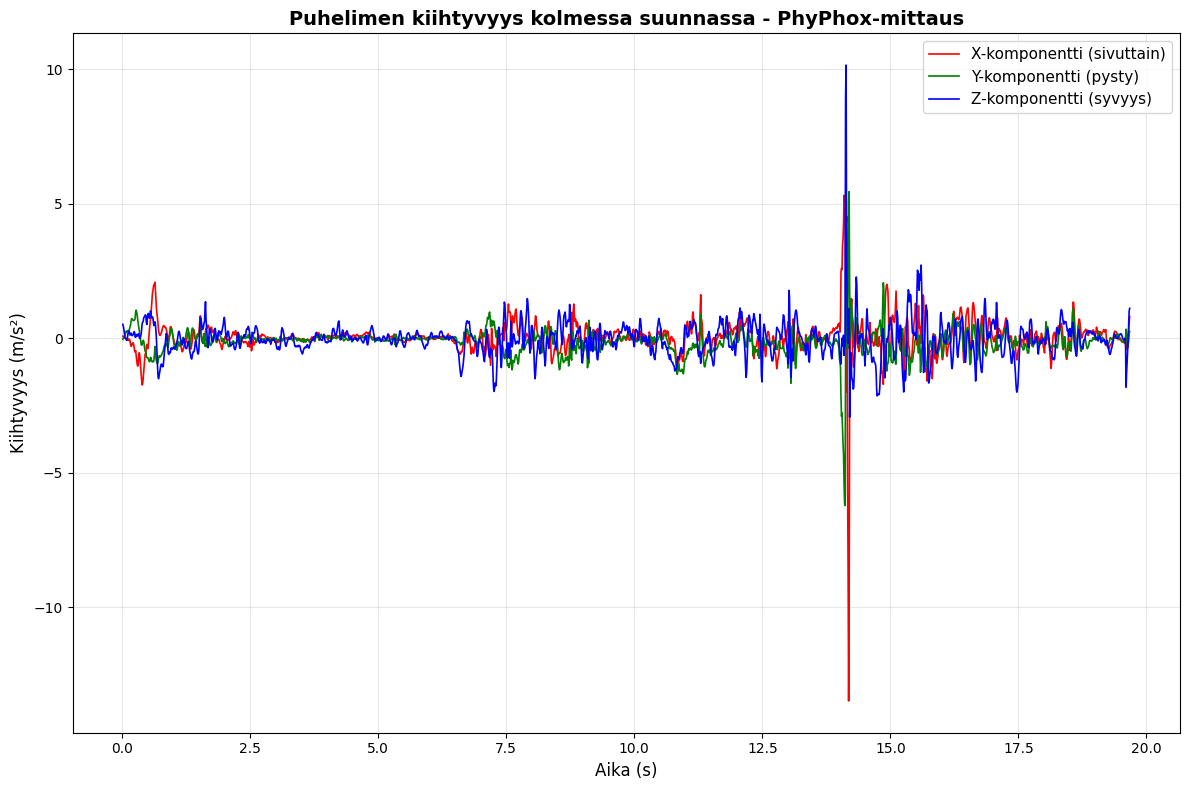


📋 Mittauksen yhteenveto:
⏱️ Mittauksen kesto: 19.67 sekuntia
📊 Datapisteiden määrä: 1975
📅 Mittaustiheys: 100.4 Hz


In [8]:
import matplotlib.pyplot as plt

# Kiihtyvyyskomponenttien visualisointi
print("📊 Luodaan kiihtyvyysdata-analyysi...")

# Piirretään kaikki kolme kiihtyvyyskomponenttia samaan kuvaajaan
plt.figure(figsize=(12, 8))

# Kiihtyvyyskomponentit eri väreillä
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], 
         label='X-komponentti (sivuttain)', color='red', linewidth=1.2)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], 
         label='Y-komponentti (pysty)', color='green', linewidth=1.2) 
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], 
         label='Z-komponentti (syvyys)', color='blue', linewidth=1.2)

# Kuvaajan muotoilu
plt.xlabel('Aika (s)', fontsize=12)
plt.ylabel('Kiihtyvyys (m/s²)', fontsize=12)
plt.title('Puhelimen kiihtyvyys kolmessa suunnassa - PhyPhox-mittaus', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Näytetään myös datan perustiedot
print("\n📋 Mittauksen yhteenveto:")
print(f"⏱️ Mittauksen kesto: {df['Time (s)'].max():.2f} sekuntia")
print(f"📊 Datapisteiden määrä: {len(df)}")
print(f"📅 Mittaustiheys: {len(df)/df['Time (s)'].max():.1f} Hz")

In [9]:
# Luo Word-dokumentti jossa kaikki kuvat ovat mukana
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt
import os
import time

# Luo Word-dokumentti
doc = Document()

# Lisää otsikko
doc.add_heading('PhyPhox Kiihtyvyysmittaus - Täydellinen Analyysi', 0)

# SIVU 1: Puhelimen kuva
doc.add_heading('1. PhyPhox-mittaus puhelimella', level=1)
if os.path.exists('Kiihtyvyys_kuva.jpg'):
    doc.add_picture('Kiihtyvyys_kuva.jpg', width=Inches(5))
    doc.add_paragraph('Kuva 1: Puhelimen ruutukaappaus PhyPhox-sovelluksesta mittauksen aikana.')
else:
    doc.add_paragraph('HUOM: Lisää tähän puhelimen ruutukaappaus "Kiihtyvyys_kuva.jpg"')

# SIVU 2: Yhdistetty kuvaaja
doc.add_heading('2. Python-analyysi: Kaikki komponentit yhdessä', level=1)

# Tallenna yhdistetty kuvaaja väliaikaisesti
plt.figure(figsize=(12, 8))
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], label='x-komponentti', color='red', linewidth=1.5)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], label='y-komponentti', color='green', linewidth=1.5) 
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='z-komponentti', color='blue', linewidth=1.5)
plt.xlabel('Aika (s)', fontsize=12)
plt.ylabel('Kiihtyvyys (m/s²)', fontsize=12)
plt.title('Kaikki komponentit yhdessä', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temp_yhdistetty.png', dpi=300, bbox_inches='tight')
plt.close()

doc.add_picture('temp_yhdistetty.png', width=Inches(6.5))
doc.add_paragraph('Kuva 2: Kaikki kolme kiihtyvyyskomponenttia samassa kuvaajassa.')

# SIVU 3: Erilliset komponentit
doc.add_heading('3. Erilliset komponentit', level=1)
doc.add_paragraph('Seuraavaksi analysoidaan jokainen komponentti erikseen:')

# X-komponentti
doc.add_heading('3.1 X-komponentti (sivuttaissuunta)', level=2)
plt.figure(figsize=(10, 6))
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], color='red', linewidth=2)
plt.xlabel('Aika (s)', fontsize=12)
plt.ylabel('X-kiihtyvyys (m/s²)', fontsize=12)
plt.title('X-komponentti', fontsize=14, fontweight='bold', color='red')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temp_x.png', dpi=300, bbox_inches='tight')
plt.close()

doc.add_picture('temp_x.png', width=Inches(5.5))
doc.add_paragraph('Kuva 3: X-komponentin kiihtyvyys (sivuttaissuunta).')

# Y-komponentti
doc.add_heading('3.2 Y-komponentti (pystysuunta)', level=2)
plt.figure(figsize=(10, 6))
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], color='green', linewidth=2)
plt.xlabel('Aika (s)', fontsize=12)
plt.ylabel('Y-kiihtyvyys (m/s²)', fontsize=12)
plt.title('Y-komponentti', fontsize=14, fontweight='bold', color='green')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temp_y.png', dpi=300, bbox_inches='tight')
plt.close()

doc.add_picture('temp_y.png', width=Inches(5.5))
doc.add_paragraph('Kuva 4: Y-komponentin kiihtyvyys (pystysuunta).')

# Z-komponentti
doc.add_heading('3.3 Z-komponentti (syvyyssuunta)', level=2)
plt.figure(figsize=(10, 6))
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], color='blue', linewidth=2)
plt.xlabel('Aika (s)', fontsize=12)
plt.ylabel('Z-kiihtyvyys (m/s²)', fontsize=12)
plt.title('Z-komponentti', fontsize=14, fontweight='bold', color='blue')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temp_z.png', dpi=300, bbox_inches='tight')
plt.close()

doc.add_picture('temp_z.png', width=Inches(5.5))
doc.add_paragraph('Kuva 5: Z-komponentin kiihtyvyys (syvyyssuunta).')

# YHTEENVETO
doc.add_heading('4. Yhteenveto', level=1)
doc.add_paragraph(f'Mittauksen kesto: {df["Time (s)"].max():.1f} sekuntia')
doc.add_paragraph(f'Datapisteiden määrä: {len(df)} kpl')
doc.add_paragraph('Analyysi suoritettu Python-ohjelmalla käyttäen PhyPhox-dataa.')
doc.add_paragraph('Kuvaajat näyttävät puhelimen liikkeen kaikissa kolmessa suunnassa.')

# Tallenna Word-dokumentti - uudella nimellä jos vanha on lukittu
filename = f'tehtava_palautus_{int(time.time())}.docx'
try:
    doc.save(filename)
    print(f"✅ Word-dokumentti '{filename}' luotu!")
except PermissionError:
    # Jos tämäkin epäonnistuu, kokeile toisella nimellä
    import random
    filename = f'tehtava_palautus_{random.randint(1000,9999)}.docx'
    doc.save(filename)
    print(f"✅ Word-dokumentti '{filename}' luotu!")

# Siivoa väliaikaiset tiedostot
temp_files = ['temp_yhdistetty.png', 'temp_x.png', 'temp_y.png', 'temp_z.png']
for temp_file in temp_files:
    if os.path.exists(temp_file):
        os.remove(temp_file)

print("📄 Dokumentti sisältää:")
print("   📱 Puhelimen ruutukaapaisen")
print("   📊 Yhdistetyn kuvaajan (kaikki komponentit)")
print("   🔴 X-komponentin kuvaajan")
print("   🟢 Y-komponentin kuvaajan") 
print("   🔵 Z-komponentin kuvaajan")
print("   📋 Yhteenvedon")
print(f"\n💡 Avaa '{filename}' Word-tiedosto ja tallenna PDF:nä tehtävän palautusta varten!")
print("⚠️ Jos vanhat tiedostot olivat auki Wordissa, sulje ne ensin.")

✅ Word-dokumentti 'tehtava_palautus_1762508208.docx' luotu!
📄 Dokumentti sisältää:
   📱 Puhelimen ruutukaapaisen
   📊 Yhdistetyn kuvaajan (kaikki komponentit)
   🔴 X-komponentin kuvaajan
   🟢 Y-komponentin kuvaajan
   🔵 Z-komponentin kuvaajan
   📋 Yhteenvedon

💡 Avaa 'tehtava_palautus_1762508208.docx' Word-tiedosto ja tallenna PDF:nä tehtävän palautusta varten!
⚠️ Jos vanhat tiedostot olivat auki Wordissa, sulje ne ensin.
